# Business Problem

We are an Indian telecom company, our customers are churning and we want to know why and what we can do about it. 

# Data Collection

We collect the customer data with an indicator for whether or not the customer has churned. 

In [70]:
# Installing packages
!pip install opendatasets -q

In [71]:
import opendatasets as od

# Downloading kaggle dataset
od.download("https://www.kaggle.com/datasets/suraj520/telecom-churn-dataset/data")

Skipping, found downloaded files in ".\telecom-churn-dataset" (use force=True to force download)


In [72]:
import pandas as pd

# Converting the .csv file to a pandas DataFrame and limiting the data to 10000 rows
churn_original = pd.read_csv("telecom-churn-dataset/telecom_churn.csv")
churn_df = churn_original.sample(10000, random_state=42)
churn_df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
230796,230797,Airtel,M,20,Tamil Nadu,Delhi,285677,2023-03-01,2,104752,38,47,1687,0
191985,191986,Vodafone,F,68,Uttarakhand,Delhi,679704,2022-08-18,2,71706,43,33,991,0
18778,18779,Vodafone,M,30,Goa,Mumbai,837926,2020-04-03,4,137473,-2,12,6803,0
241016,241017,Vodafone,M,22,Madhya Pradesh,Chennai,679346,2023-04-21,0,58245,32,11,2832,0
136494,136495,Reliance Jio,M,63,Tripura,Bangalore,839738,2021-11-14,4,73740,68,11,5375,0


In [73]:
# Checking that we just have 10000 rows in the dataframe
churn_df.shape

(10000, 14)

In [74]:
# Definition of attributes
# - customer_id: Unique identifier for each customer.
# - telecom_partner: The telecom partner associated with the customer.
# - gender: The gender of the customer.
# - age: The age of the customer.
# - state: The Indian state in which the customer is located.
# - city: The city in which the customer is located.
# - pincode: The pincode of the customer's location.
# - date_of_registration: The date on which the customer registered with the telecom partner.
# - num_dependents: The number of dependents (e.g. children) the customer has.
# - estimated_salary: The customer's estimated salary.
# - calls_made: The number of calls made by the customer.
# - sms_sent: The number of SMS messages sent by the customer.
# - data_used: The amount of data used by the customer.
# - churn: Binary variable indicating whether the customer has churned or not (1 = churned, 0 = not churned).

# Data Understanding: Exploratory Data Analysis (EDA)

We apply exploratory data analysis to inform data preprocessing and modeling.  

In [77]:
# Checking for null values and data types of attributes
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 230796 to 219901
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10000 non-null  int64 
 1   telecom_partner       10000 non-null  object
 2   gender                10000 non-null  object
 3   age                   10000 non-null  int64 
 4   state                 10000 non-null  object
 5   city                  10000 non-null  object
 6   pincode               10000 non-null  int64 
 7   date_of_registration  10000 non-null  object
 8   num_dependents        10000 non-null  int64 
 9   estimated_salary      10000 non-null  int64 
 10  calls_made            10000 non-null  int64 
 11  sms_sent              10000 non-null  int64 
 12  data_used             10000 non-null  int64 
 13  churn                 10000 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.1+ MB


In [78]:
# Checking the distribution of attributes
churn_df.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,122032.291000,45.647700,548632.559600,1.972000,84996.005400,48.537900,23.831100,5007.241400,0.199100
std,70009.038314,16.421734,259407.869696,1.414078,37166.153934,29.417904,14.651124,2941.040747,0.399343
min,13.000000,18.000000,100176.000000,0.000000,20001.000000,-10.000000,-5.000000,-962.000000,0.000000
25%,61219.500000,32.000000,325073.000000,1.000000,53294.500000,24.000000,11.000000,2519.750000,0.000000
50%,122005.500000,46.000000,547532.000000,2.000000,85204.500000,48.000000,24.000000,5005.500000,0.000000
75%,182122.500000,60.000000,771495.750000,3.000000,117152.500000,74.000000,36.000000,7490.750000,0.000000
max,243476.000000,74.000000,999974.000000,4.000000,149993.000000,108.000000,53.000000,10964.000000,1.000000


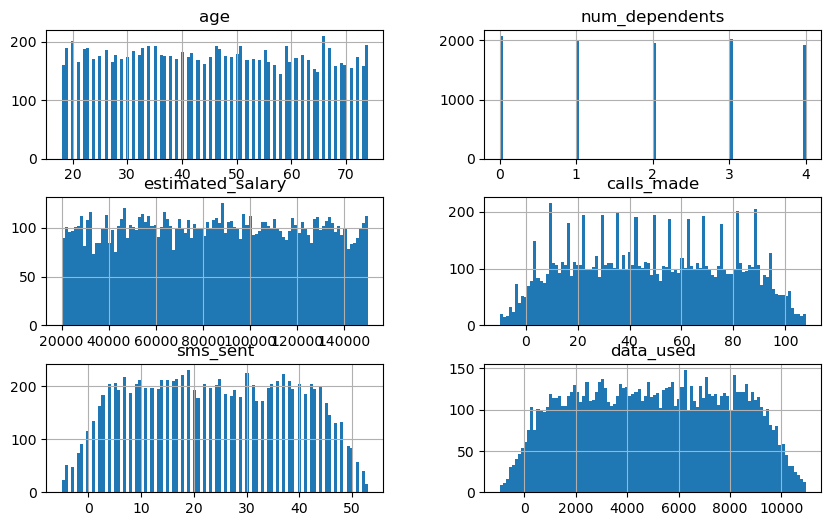

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Making a histogram for numerical features
churn_df[["age", "num_dependents", "estimated_salary", "calls_made", "sms_sent", "data_used"]].hist(bins=100, figsize=(10, 6))
plt.show()

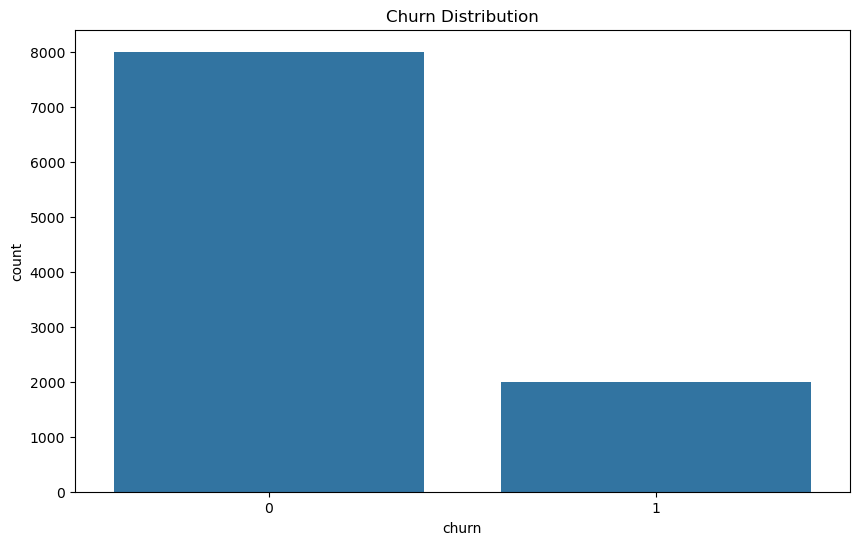

In [80]:
# Showing distribution of churn
plt.figure(figsize=(10, 6))
sns.countplot(x="churn", data=churn_df)
plt.title("Churn Distribution")
plt.show()

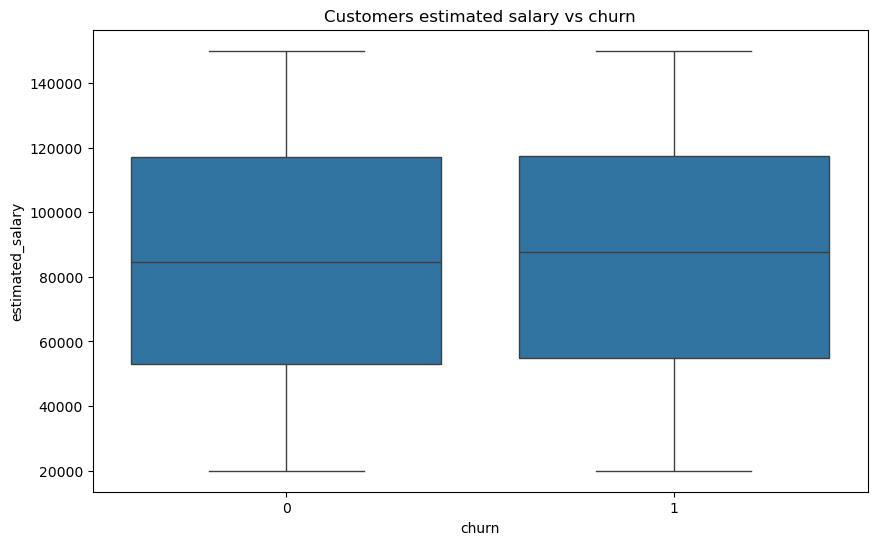

In [81]:
# Customers estimated salary vs churn
plt.figure(figsize=(10, 6))
sns.boxplot(x="churn", y="estimated_salary", data=churn_df)
plt.title("Customers estimated salary vs churn")
plt.show()

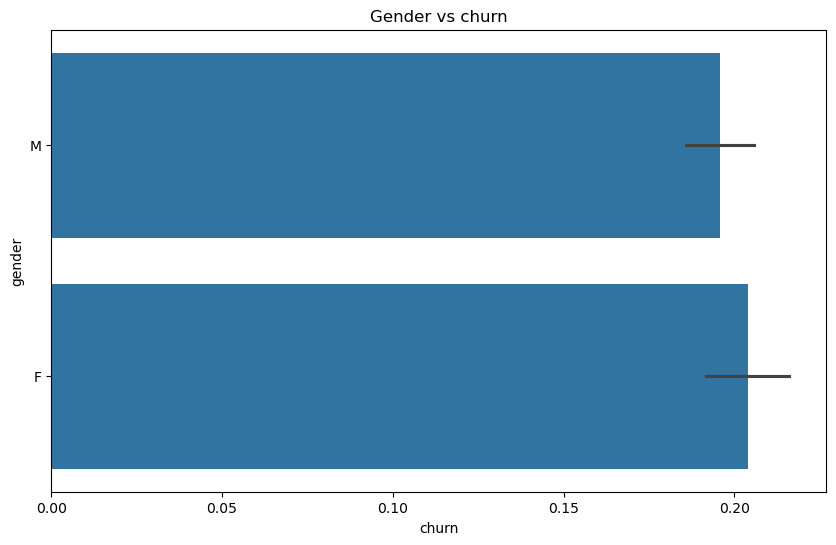

In [82]:
# Gender vs churn
plt.figure(figsize=(10, 6))
sns.barplot(x="churn", y="gender", data=churn_df)
plt.title("Gender vs churn")
plt.show()

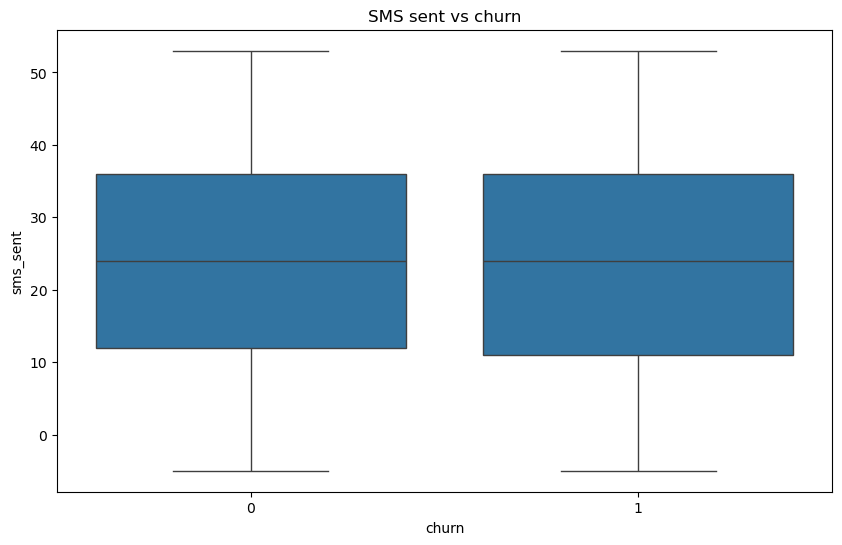

In [83]:
# SMS sent vs churn
plt.figure(figsize=(10, 6))
sns.boxplot(x="churn", y="sms_sent", data=churn_df)
plt.title("SMS sent vs churn")
plt.show()

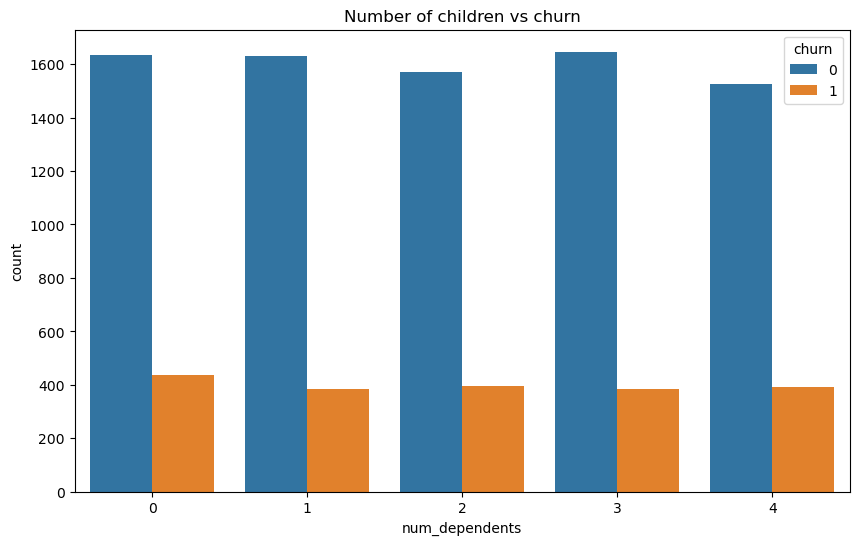

In [84]:
# Number of children vs churn
plt.figure(figsize=(10, 6))
sns.countplot(x="num_dependents", hue="churn", data=churn_df)
plt.title("Number of children vs churn")
plt.show()

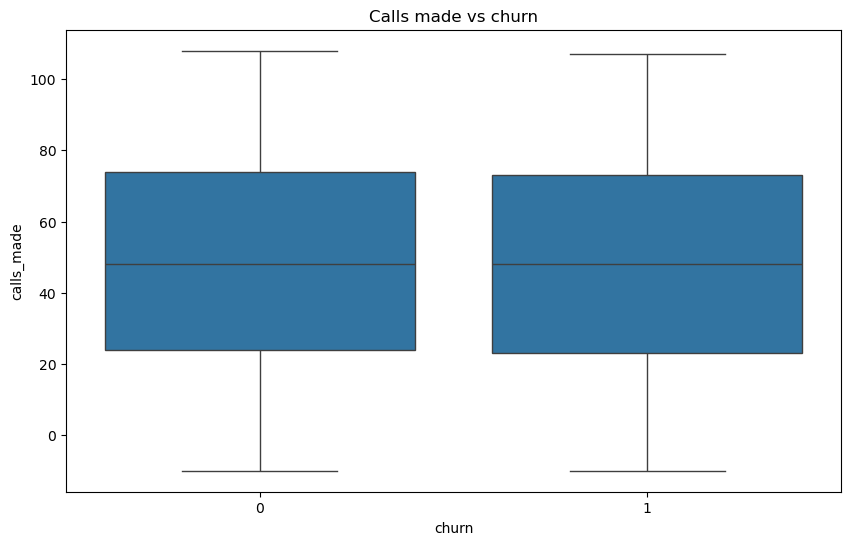

In [85]:
# Calls made vs churn
plt.figure(figsize=(10, 6))
sns.boxplot(x="churn", y="calls_made", data=churn_df)
plt.title("Calls made vs churn")
plt.show()

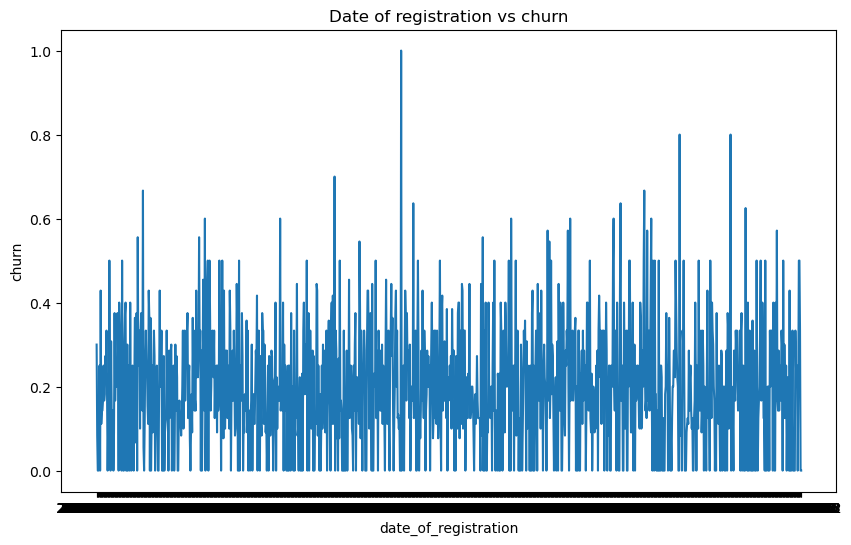

In [86]:
# Date of registration vs churn
plt.figure(figsize=(10, 6))
sns.lineplot(x="date_of_registration", y="churn", data=churn_df, estimator="mean", errorbar=None)
plt.title("Date of registration vs churn")
plt.show()

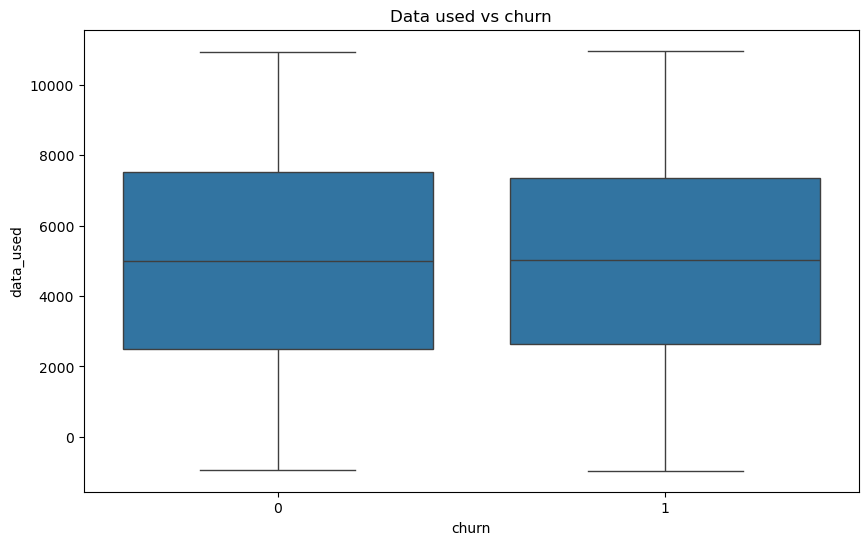

In [87]:
# Data used vs churn
plt.figure(figsize=(10, 6))
sns.boxplot(x="churn", y="data_used", data=churn_df)
plt.title("Data used vs churn")
plt.show()

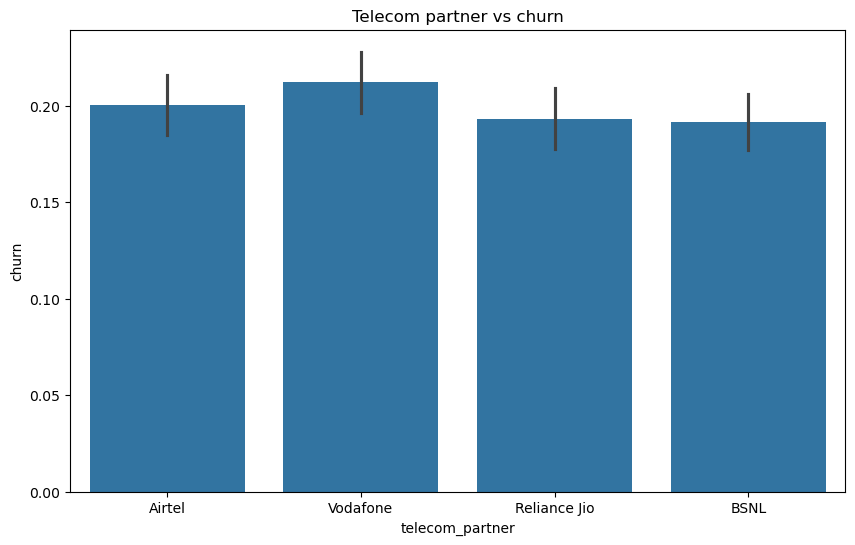

In [88]:
# Telecom partner vs churn
plt.figure(figsize=(10, 6))
sns.barplot(x="telecom_partner", y="churn", data=churn_df)
plt.title("Telecom partner vs churn")
plt.show()

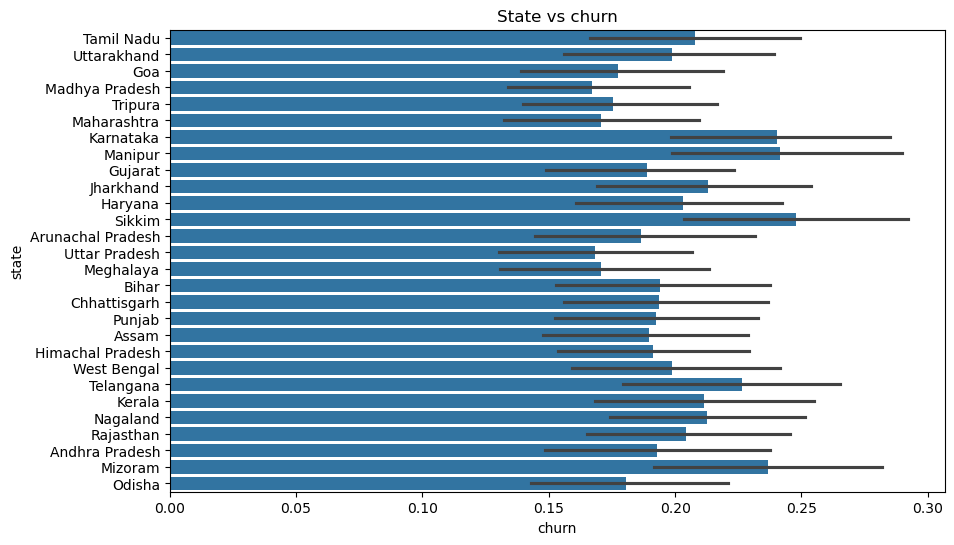

In [89]:
# State vs churn
plt.figure(figsize=(10, 6))
sns.barplot(x="churn", y="state", data=churn_df)
plt.title("State vs churn")
plt.show()

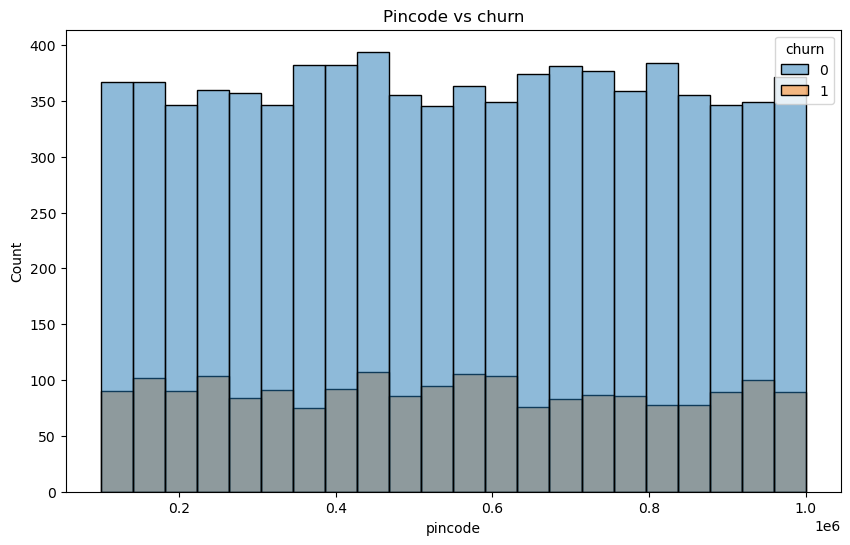

In [90]:
# Pincode vs churn
plt.figure(figsize=(10, 6))
sns.histplot(x="pincode", hue="churn", data=churn_df)
plt.title("Pincode vs churn")
plt.show()

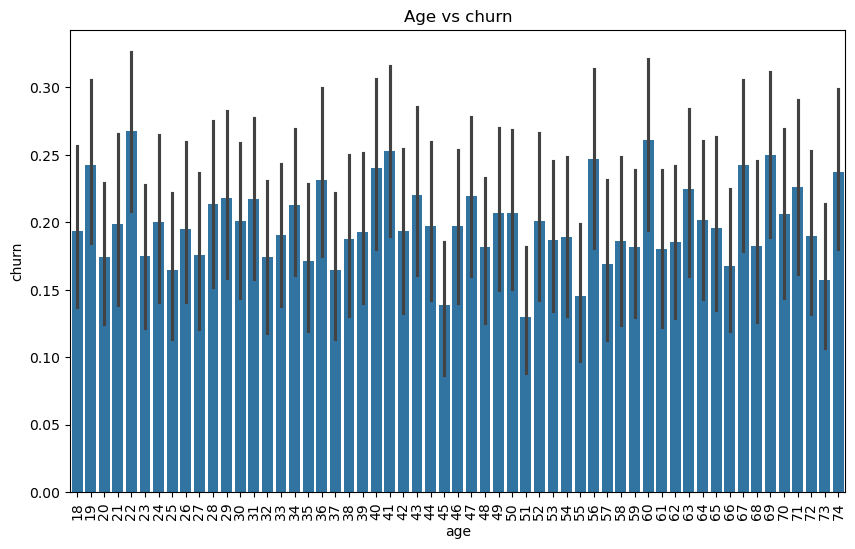

In [91]:
# Age vs churn
plt.figure(figsize=(10, 6))
sns.barplot(x="age", y="churn", data=churn_df)
plt.xticks(rotation=90)
plt.title("Age vs churn")
plt.show()

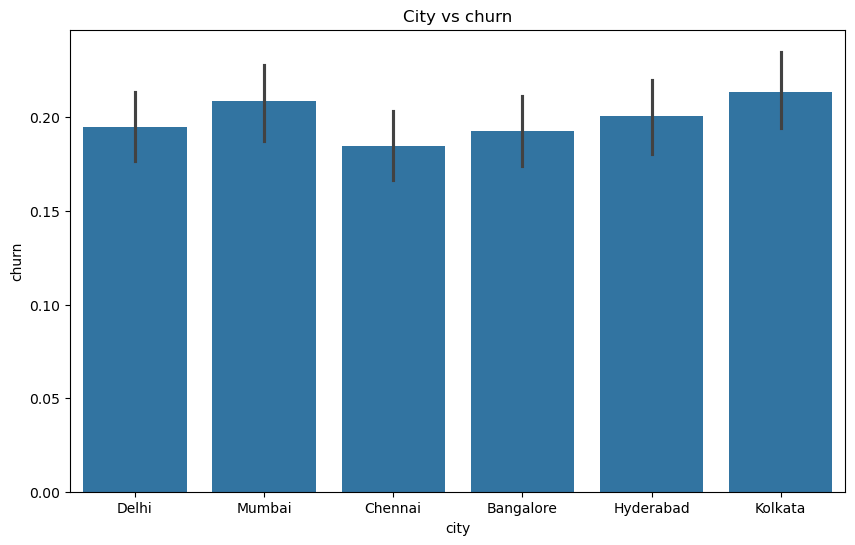

In [92]:
# City vs churn
plt.figure(figsize=(10, 6))
sns.barplot(x="city", y="churn", data=churn_df)
plt.title("City vs churn")
plt.show()

# Data Preprocessing

We address missing and invalid values, remove any duplicates or outliers found during EDA, validate that the data is properly formatted and ensure we have the necessary features needed for machine learning.  

In [95]:
# Checking for null values
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 230796 to 219901
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10000 non-null  int64 
 1   telecom_partner       10000 non-null  object
 2   gender                10000 non-null  object
 3   age                   10000 non-null  int64 
 4   state                 10000 non-null  object
 5   city                  10000 non-null  object
 6   pincode               10000 non-null  int64 
 7   date_of_registration  10000 non-null  object
 8   num_dependents        10000 non-null  int64 
 9   estimated_salary      10000 non-null  int64 
 10  calls_made            10000 non-null  int64 
 11  sms_sent              10000 non-null  int64 
 12  data_used             10000 non-null  int64 
 13  churn                 10000 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.1+ MB


In [96]:
# Checking for duplicates
churn_df.duplicated().sum()

0

In [97]:
# Checking for invalid ages
invalid_ages = churn_df[churn_df["age"] < 0]
invalid_ages

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn


In [98]:
# Checking for invalid churn values
churn_df["churn"].unique()

array([0, 1], dtype=int64)

In [99]:
# Ensuring no string values have leading or trailing spaces
churn_df = churn_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [100]:
# Making an aggregate age column, to separate people into young, middle aged and old categories
def categorize_age(age):
    if age < 30:
        return "young"
    elif 30 <= age <= 50:
        return "middle aged"
    else: 
        return "old"
        
churn_df["age_bracket"] = churn_df["age"].apply(categorize_age)
churn_df["age_bracket"] = pd.Categorical(churn_df["age_bracket"], categories = ["young", "middle aged", "old"], ordered=True)
churn_df["age_bracket"].head()

230796          young
191985            old
18778     middle aged
241016          young
136494            old
Name: age_bracket, dtype: category
Categories (3, object): ['young' < 'middle aged' < 'old']

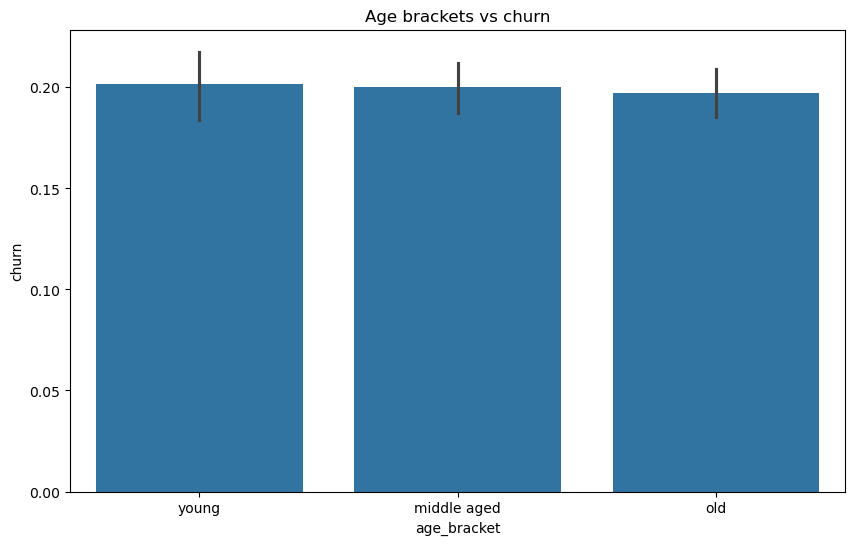

In [101]:
# Age bracket vs churn
plt.figure(figsize=(10, 6))
sns.barplot(x="age_bracket", y="churn", data=churn_df)
plt.title("Age brackets vs churn")
plt.show()

In [102]:
# Making an aggregate estimated salary feature to separate people into low salary, mid salary and high salary
def categorize_salary(salary):
    if salary < 50000:
        return "low_salary"
    elif 50000 <= salary <= 100000:
        return "mid_salary"
    else: 
        return "high_salary"

churn_df["salary_bracket"] = churn_df["estimated_salary"].apply(categorize_salary)
churn_df["salary_bracket"] = pd.Categorical(churn_df["salary_bracket"], categories = ["low_salary", "mid_salary", "high_salary"], ordered=True)
churn_df["salary_bracket"].head()

230796    high_salary
191985     mid_salary
18778     high_salary
241016     mid_salary
136494     mid_salary
Name: salary_bracket, dtype: category
Categories (3, object): ['low_salary' < 'mid_salary' < 'high_salary']

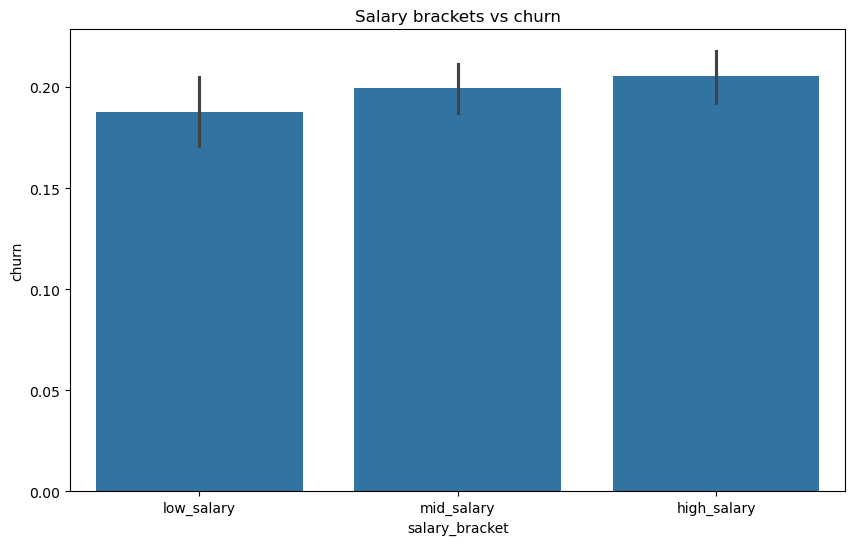

In [103]:
# Salary bracket vs churn
plt.figure(figsize=(10, 6))
sns.barplot(x="salary_bracket", y="churn", data=churn_df)
plt.title("Salary brackets vs churn")
plt.show()

In [104]:
# Making an aggregate date feature, to separate dates into months
churn_df["date_of_registration"] = pd.to_datetime(churn_df["date_of_registration"])
churn_df["month"] = churn_df["date_of_registration"].dt.month
churn_df["month"].head()

230796     3
191985     8
18778      4
241016     4
136494    11
Name: month, dtype: int32

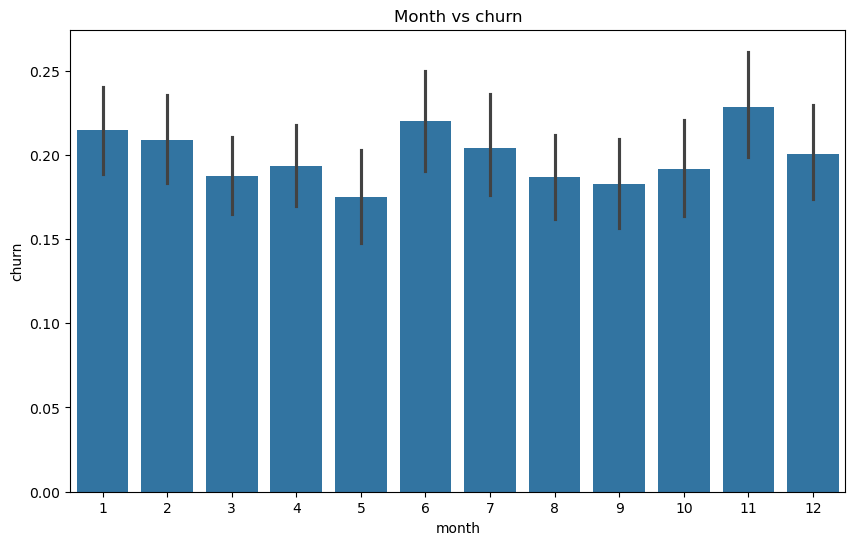

In [105]:
# Month vs churn
plt.figure(figsize=(10, 6))
sns.barplot(x="month", y="churn", data=churn_df)
plt.title("Month vs churn")
plt.show()

In [106]:
# Checking to confirm that the date_of_registration data type has been changed to datetime
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 230796 to 219901
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           10000 non-null  int64         
 1   telecom_partner       10000 non-null  object        
 2   gender                10000 non-null  object        
 3   age                   10000 non-null  int64         
 4   state                 10000 non-null  object        
 5   city                  10000 non-null  object        
 6   pincode               10000 non-null  int64         
 7   date_of_registration  10000 non-null  datetime64[ns]
 8   num_dependents        10000 non-null  int64         
 9   estimated_salary      10000 non-null  int64         
 10  calls_made            10000 non-null  int64         
 11  sms_sent              10000 non-null  int64         
 12  data_used             10000 non-null  int64         
 13  churn          

In [107]:
# Checking the distribution of dates
max_date = churn_df["date_of_registration"].max()
min_date = churn_df["date_of_registration"].min()

print(max_date)
print(min_date)
print(max_date-min_date)

2023-05-03 00:00:00
2020-01-01 00:00:00
1218 days 00:00:00


In [108]:
# Checking number of unique values for each attribute
churn_df.nunique()

customer_id             10000
telecom_partner             4
gender                      2
age                        57
state                      28
city                        6
pincode                  9962
date_of_registration     1218
num_dependents              5
estimated_salary         9636
calls_made                119
sms_sent                   59
data_used                6517
churn                       2
age_bracket                 3
salary_bracket              3
month                      12
dtype: int64

In [109]:
# Removing high_cardinality features from the DataFrame
churn_clean_df = churn_df.copy()
churn_clean_df.drop(["customer_id", "pincode", "estimated_salary", "data_used", "date_of_registration"], axis=1, inplace=True)
churn_clean_df.nunique()

telecom_partner      4
gender               2
age                 57
state               28
city                 6
num_dependents       5
calls_made         119
sms_sent            59
churn                2
age_bracket          3
salary_bracket       3
month               12
dtype: int64

In [110]:
# Removing identified features with low variance between churning and not churning
churn_clean_df.drop(["sms_sent", "calls_made", "age_bracket"], axis=1, inplace=True)

In [111]:
# Checking the updated list of attributes
churn_clean_df.columns

Index(['telecom_partner', 'gender', 'age', 'state', 'city', 'num_dependents',
       'churn', 'salary_bracket', 'month'],
      dtype='object')

# Model Training and Evaluation

We train machine learning models to predict the customers that will churn. 

In [114]:
# Installing packages
!pip install xgboost -q

In [115]:
# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing and transformers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Imbalanced learning
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Choosing features to include, based on iterative model performance
chosen_parameters = ["telecom_partner", "state", "city", "num_dependents", "month", "age", "salary_bracket"]
categorical_parameters = ["telecom_partner", "state", "city", "num_dependents", "month", "salary_bracket"]
numerical_parameters = ["age"]

# Splitting the data into training and test data
X = churn_clean_df[chosen_parameters]
y = churn_clean_df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Calculating class_weight_ratio for the XGBClassifier model
class_weight_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

In [116]:
# Transforming categorical features to numerical features for universal machine learning model compatibility
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_parameters),
        ("cat_one", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), categorical_parameters)
    ]
)

In [200]:
import sklearn
print(sklearn.__version__)

1.5.1


In [117]:
# Resampling to oversample underrepresented churn value 1
smote = SMOTE(sampling_strategy="auto", random_state=42)

In [118]:
# Defining pipelines for model training and evaluation
models = {
    "Logistic Regression": ImbPipeline([
        ("preprocessor", preprocessor),
        ("oversampling", smote),
        ("classifier", LogisticRegression(random_state=42))
    ]), 
    "Decision Tree": ImbPipeline([
        ("preprocessor", preprocessor), 
        ("oversampling", smote),
        ("classifier", DecisionTreeClassifier(random_state=42))
    ]), 
    "Random Forest": ImbPipeline([
        ("preprocessor", preprocessor), 
        ("oversampling", smote),
        ("classifier", RandomForestClassifier(random_state=42))
    ]), 
    "Gradient Boosting": ImbPipeline([
        ("preprocessor", preprocessor),
        ("oversampling", smote),
        ("classifier", GradientBoostingClassifier(random_state=42))
    ]), 
    "SVM": ImbPipeline([
        ("preprocessor", preprocessor),
        ("oversampling", smote),
        ("classifier", SVC(random_state=42))
    ]),
    "XGBoost": ImbPipeline([
        ("preprocessor", preprocessor),
        ("oversampling", smote),
        ("classifier", XGBClassifier(random_state=42))
    ]),
}

In [119]:
# Defining hyperparameter grids for classification machine learning models
param_grids = {   
"Logistic Regression": {
    "classifier__C": [0.1, 1, 10], 
    "classifier__solver": ["liblinear", "saga"], 
    "classifier__class_weight": ["balanced", None]
    },
"Decision Tree": {
    "classifier__max_depth": [3, 5, 7, 10, 15, 20], 
    "classifier__min_samples_split": [2, 5, 10], 
    "classifier__class_weight": ["balanced", None]
    },
"Random Forest": {
    "classifier__n_estimators": [100, 200, 300], 
    "classifier__max_depth": [10, 20, 30], 
    "classifier__class_weight": ["balanced", None]
    },
"Gradient Boosting": {
    "classifier__n_estimators": [100, 200, 300], 
    "classifier__learning_rate": [0.01, 0.1, 0.5, 1], 
    "classifier__subsample": [0.8, 1.0], 
    "classifier__max_depth": [3, 5, 7]
    },
"SVM": {
    "classifier__C": [0.1, 1, 10], 
    "classifier__kernel": ["linear", "rbf"], 
    "classifier__class_weight": ["balanced", None]
    },
"XGBoost": {
    "classifier__n_estimators": [100, 200, 300], 
    "classifier__learning_rate": [0.01, 0.1, 0.5, 1],
    "classifier__subsample": [0.8, 1.0], 
    "classifier__max_depth": [3, 5, 7], 
    "classifier__colsample_bytree": [0.8, 1.0]
    }
}

In [120]:
# Using GridSearchCV to find the best model
best_models = {}

for model_name, model_pipeline in models.items():
    print(f"Training {model_name}...")

    # Accessing the hyperparameter grid for the current model
    param_grid = param_grids[model_name]

    # Performing grid search
    grid_search = GridSearchCV(model_pipeline, param_grid, cv=StratifiedKFold(n_splits=5), 
                               n_jobs=-1, verbose=1, scoring="f1")
    grid_search.fit(X_train, y_train)

    # Storing the best model
    best_models[model_name] = grid_search.best_estimator_

    # Evaluating the best model on the test set
    y_pred = grid_search.predict(X_test)

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"\nClassification report for {model_name}:\n{classification_report(y_test, y_pred, zero_division=1)}")

Training Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Logistic Regression: {'classifier__C': 10, 'classifier__class_weight': 'balanced', 'classifier__solver': 'liblinear'}

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.56      0.66      1602
           1       0.21      0.48      0.29       398

    accuracy                           0.54      2000
   macro avg       0.51      0.52      0.48      2000
weighted avg       0.69      0.54      0.59      2000

Training Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 3, 'classifier__min_samples_split': 2}

Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.22      0.34      1602
           1   

C:\ProgramData\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for XGBoost: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}

Classification report for XGBoost:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1602
           1       0.23      0.19      0.21       398

    accuracy                           0.71      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.69      0.71      0.70      2000



In [121]:
# Variables for the best model
best_recall = 0
best_accuracy = 0
best_f1_score = 0
best_model = None

# Stores the recalls, accuracies and f1-scores of all models
model_recalls = {}
model_accuracies = {}
model_f1_scores = {}

for model_name, model in best_models.items():
    # Gets the model's recall, accuracy and f1_score
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    recall = report["1"]["recall"]
    f1_score = report["1"]["f1-score"]
    accuracy = accuracy_score(y_test, y_pred)

    # Stores the model's recall, accuracy and f1-score
    model_recalls[model_name] = recall
    model_accuracies[model_name] = accuracy
    model_f1_scores[model_name] = f1_score

    # Updates the best model if conditions are met
    if f1_score > best_f1_score and accuracy > 0.7:
        best_f1_score = f1_score
        best_recall = recall
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = model.named_steps["classifier"]
        best_preprocessor = model.named_steps["preprocessor"]

# Displays recalls, accuracies and f1_scores of all models
for (model_name, recall), (_, accuracy), (_, f1_score) in zip(model_recalls.items(), model_accuracies.items(), model_f1_scores.items()):
    print(f"{model_name}: Recall: {recall:.4f}, f1_score {f1_score:.4f} and accuracy: {accuracy:.4f}")

# Displays the best model
print(f"The best model is: {best_model_name} with recall: {best_recall:.4f}, f1_score: {best_f1_score:.4f} and accuracy: {best_accuracy:.4f}")

Logistic Regression: Recall: 0.4799, f1_score 0.2948 and accuracy: 0.5430
Decision Tree: Recall: 0.8116, f1_score 0.3273 and accuracy: 0.3360
Random Forest: Recall: 0.0126, f1_score 0.0236 and accuracy: 0.7930
Gradient Boosting: Recall: 0.2136, f1_score 0.2009 and accuracy: 0.6620
SVM: Recall: 0.4975, f1_score 0.2762 and accuracy: 0.4810
XGBoost: Recall: 0.1935, f1_score 0.2115 and accuracy: 0.7130
The best model is: XGBoost with recall: 0.1935, f1_score: 0.2115 and accuracy: 0.7130


# Model Interpretation

We use SHAP values to interpret the feature importance of the best model. 

In [236]:
# Installing packages
!pip install shap -q

In [237]:
# Preprocesses X_train and X_test
X_train_transformed = best_preprocessor.transform(X_train)
X_test_transformed = best_preprocessor.transform(X_test)

# Gets the feature names
feature_names = best_preprocessor.get_feature_names_out()

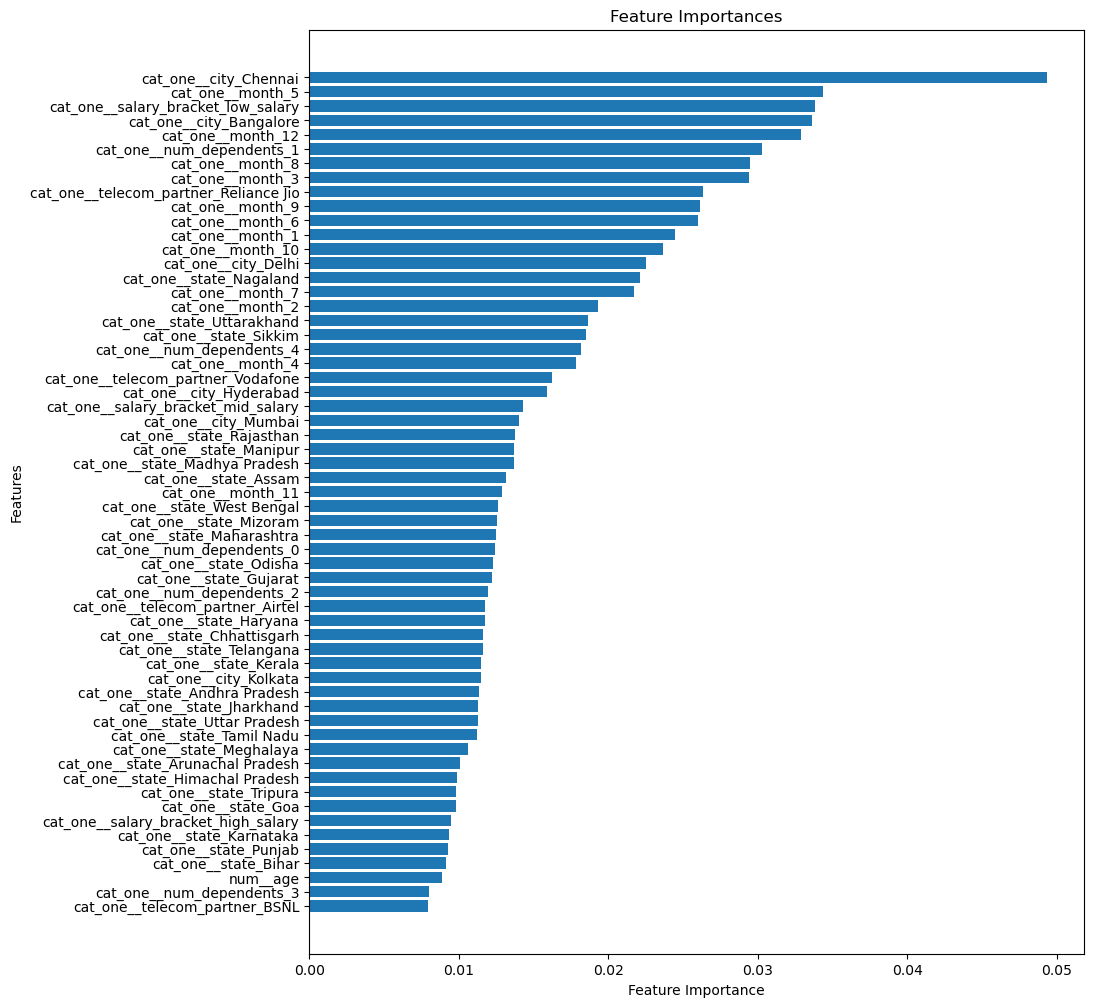

In [238]:
# Generates a feature importance plot from the best classifier model
# Gets feature names and feature importances
feature_names = best_preprocessor.get_feature_names_out()
importances = best_model.feature_importances_

# Sorts feature names and importances
sorted_indices = importances.argsort()
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Plots the feature importances
plt.figure(figsize=(10, 12))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

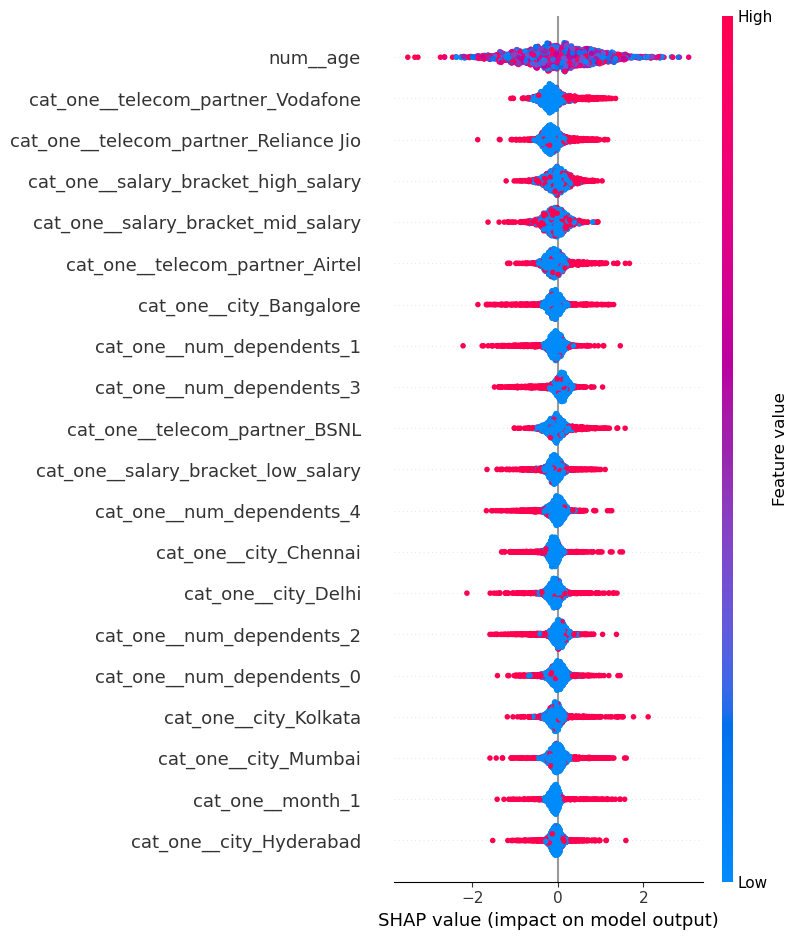

In [239]:
# Creating the shap summary plot for global impact of features on churn
import shap

# Generating shap values
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test_transformed)
shap_values.feature_names = feature_names

# Creating the shap summary plot
shap.summary_plot(shap_values, X_test_transformed)

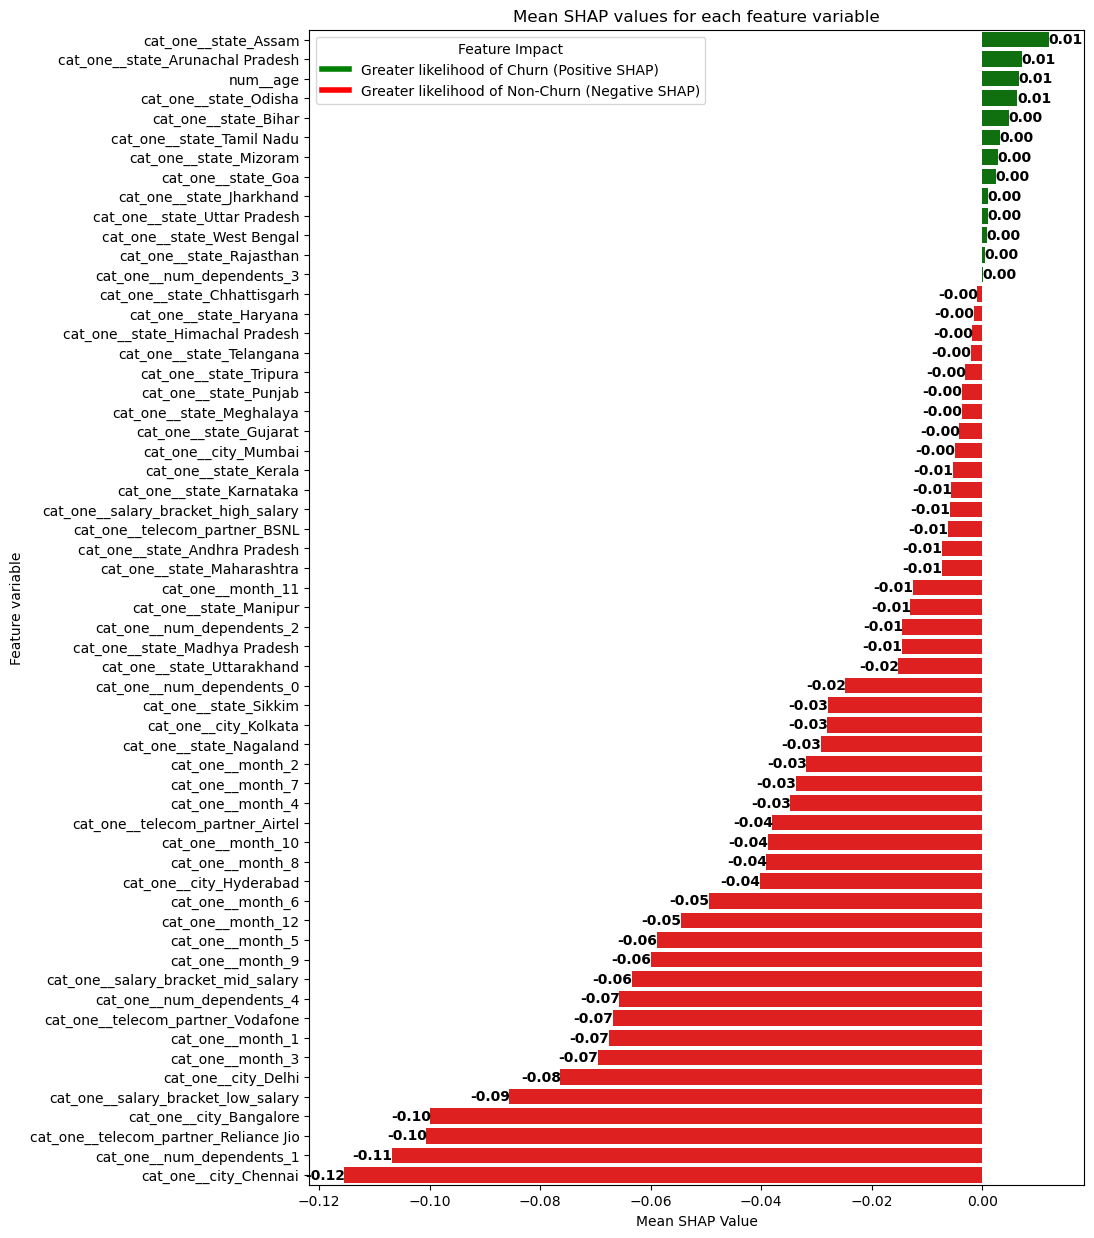

In [240]:
# Generates the mean SHAP values for each feature
import numpy as np

# Calculates the mean SHAP values for each feature across all predictions
mean_shap_values = np.mean(shap_values.values, axis=0)

# Sorts the mean SHAP values in descending order
sorted_indices = np.argsort(mean_shap_values)[::-1]  
sorted_shap_values = mean_shap_values[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Sets colors for the bars based on whether the SHAP value is positive (green) or negative (red)
colors = ["green" if value > 0 else "red" for value in sorted_shap_values]

# Creates a horizontal bar plot of the mean SHAP values for each feature
plt.figure(figsize=(10,15))
sns.barplot(x=sorted_shap_values, y=sorted_features, palette=colors, hue=sorted_features)

# Adds axis labels and title to the plot
plt.xlabel("Mean SHAP Value")
plt.ylabel("Feature variable")
plt.title("Mean SHAP values for each feature variable")

# Creates custom legend with color labels for the bars
handles = [plt.Line2D([0], [0], color='green', lw=4), 
           plt.Line2D([0], [0], color='red', lw=4)]
labels = ['Greater likelihood of Churn (Positive SHAP)', 'Greater likelihood of Non-Churn (Negative SHAP)']
plt.legend(loc="upper left", handles=handles, labels=labels, title='Feature Impact')

# Annotates the bars with their numerical values
for i, value in enumerate(sorted_shap_values):
    # If the SHAP value is positive, display the number to the right of the bar
    if value > 0:
        plt.text(value+0.003, i, f'{value:.2f}', ha="center", va='center', color='black', fontweight='bold')
    # If the SHAP value is negative, display the number to the left of the bar
    else:
        plt.text(value-0.0035, i, f'{value:.2f}', ha="center", va='center', color='black', fontweight='bold')

plt.show()

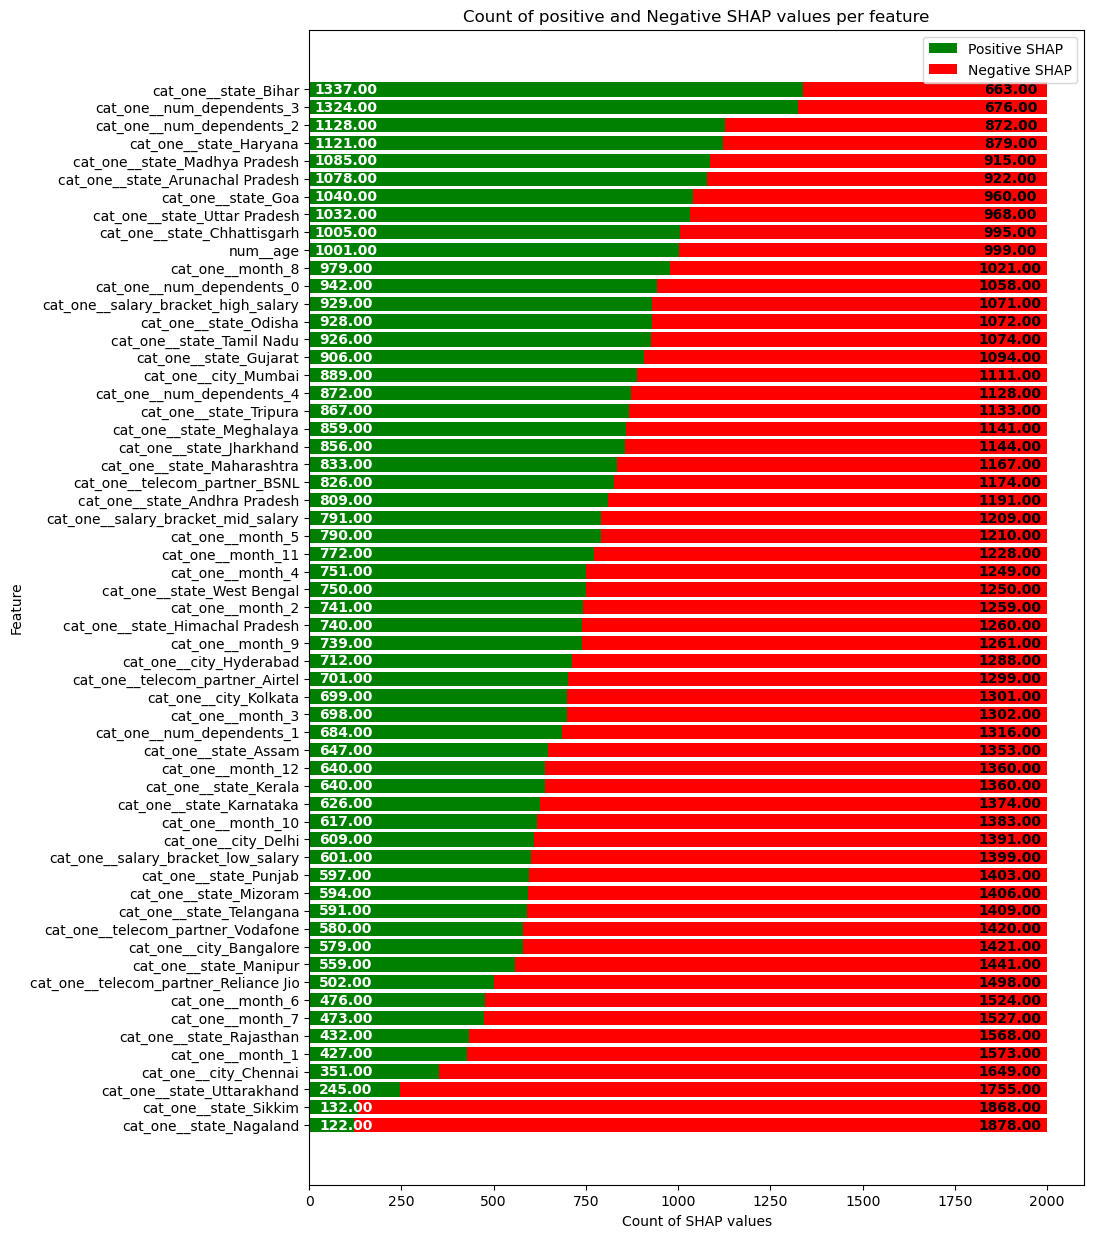

In [241]:
# Creating a horizontally stacked bar chart of positive and negative SHAP values for each feature
# Converts shap values into a numpy array
shap_values_array = shap_values.values

# Counts positive and negative shap values for each feature
positive_counts = np.sum(shap_values_array > 0, axis=0)
negative_counts = np.sum(shap_values_array < 0, axis=0)

# Creates a dataframe of features as well as positive and negative shap counts
feature_summary = list(zip(feature_names, positive_counts, negative_counts))
feature_summary_df = pd.DataFrame(feature_summary, columns=["Feature", "Positive SHAP Count", "Negative SHAP Count"])

# Sorts the dataframe by number of positive SHAP counts in ascending order
feature_summary_df = feature_summary_df.sort_values(by="Positive SHAP Count", ascending=True)

# Plots the horizontally stacked bar chart of positive and negative SHAP values
plt.figure(figsize=(10, 15))
plt.barh(feature_summary_df["Feature"], feature_summary_df["Positive SHAP Count"], color="green", label="Positive SHAP")
plt.barh(feature_summary_df["Feature"], feature_summary_df["Negative SHAP Count"], color="red", label="Negative SHAP", 
        left=feature_summary_df["Positive SHAP Count"])

# Adds labels, title and legend
plt.xlabel("Count of SHAP values")
plt.ylabel("Feature")
plt.title("Count of positive and Negative SHAP values per feature")
plt.legend(loc="upper right")

# Annotates the bars with their numerical values
for i, (positive_value, negative_value) in enumerate(zip(feature_summary_df["Positive SHAP Count"], feature_summary_df["Negative SHAP Count"])):
    if positive_value:
        plt.text(100, i, f'{positive_value:.2f}', ha="center", va='center', color='white', fontweight='bold')
    if negative_value:
        plt.text(1900, i, f'{negative_value:.2f}', ha="center", va='center', color='black', fontweight='bold')
        
plt.show()

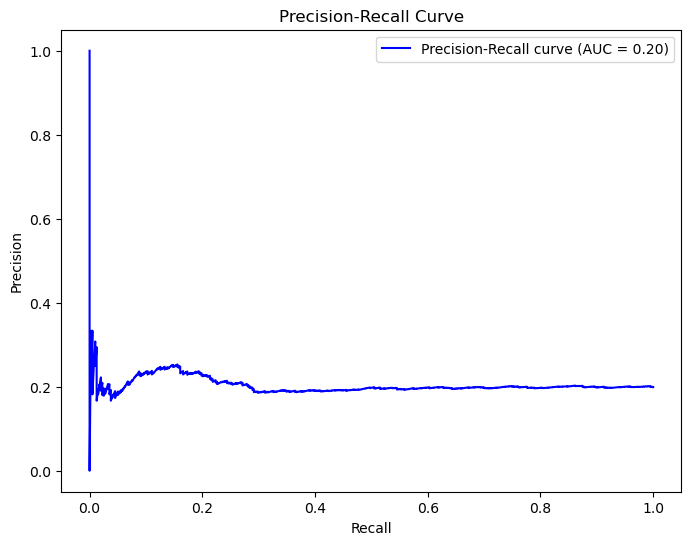

In [242]:
# Generates the precision-recall curve for the best performing model
from sklearn.metrics import precision_recall_curve, auc

# Calculates the probabilities for churning (churn=1)
y_pred_prob = best_model.predict_proba(X_test_transformed)[:, 1]

# Gets precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calculates the precision-recall curve's area under the curve (AUC)
pr_auc = auc(recall, precision)

# Plots the precision-recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color="b", label=f"Precision-Recall curve (AUC = {pr_auc:.2f})")

# Adds labels and title
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

In [243]:
# Determines the index position of features to use for partial dependence plots
i=0
for feature in feature_names:
    print(f"{i}: {feature}")
    i += 1

0: num__age
1: cat_one__telecom_partner_Airtel
2: cat_one__telecom_partner_BSNL
3: cat_one__telecom_partner_Reliance Jio
4: cat_one__telecom_partner_Vodafone
5: cat_one__state_Andhra Pradesh
6: cat_one__state_Arunachal Pradesh
7: cat_one__state_Assam
8: cat_one__state_Bihar
9: cat_one__state_Chhattisgarh
10: cat_one__state_Goa
11: cat_one__state_Gujarat
12: cat_one__state_Haryana
13: cat_one__state_Himachal Pradesh
14: cat_one__state_Jharkhand
15: cat_one__state_Karnataka
16: cat_one__state_Kerala
17: cat_one__state_Madhya Pradesh
18: cat_one__state_Maharashtra
19: cat_one__state_Manipur
20: cat_one__state_Meghalaya
21: cat_one__state_Mizoram
22: cat_one__state_Nagaland
23: cat_one__state_Odisha
24: cat_one__state_Punjab
25: cat_one__state_Rajasthan
26: cat_one__state_Sikkim
27: cat_one__state_Tamil Nadu
28: cat_one__state_Telangana
29: cat_one__state_Tripura
30: cat_one__state_Uttar Pradesh
31: cat_one__state_Uttarakhand
32: cat_one__state_West Bengal
33: cat_one__city_Bangalore
34: c

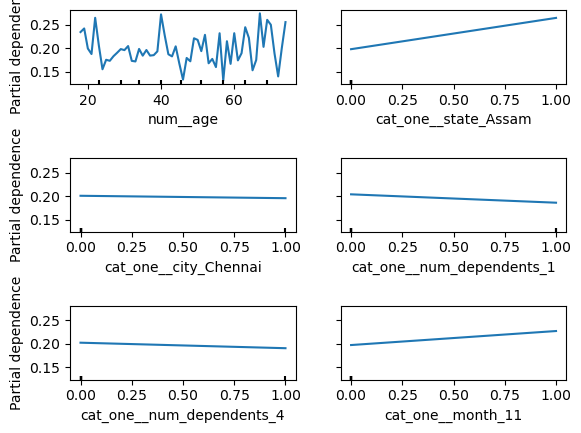

In [273]:
# Creates the partial dependence plots for specified features
from sklearn.inspection import PartialDependenceDisplay

feature_list = [0, 7, 34, 40, 43, 54]

disp = PartialDependenceDisplay.from_estimator(
    best_model, 
    X_train_transformed, 
    features=feature_list,
    feature_names = feature_names,
    n_cols=2
)

# Increases the vertical space between the plots
plt.subplots_adjust(hspace=1)
plt.show()

# Model Deployment

We deploy the model and showcase key visualizations using streamlit for interactive use. 

 95%|=================== | 1902/2000 [00:12<00:00]       

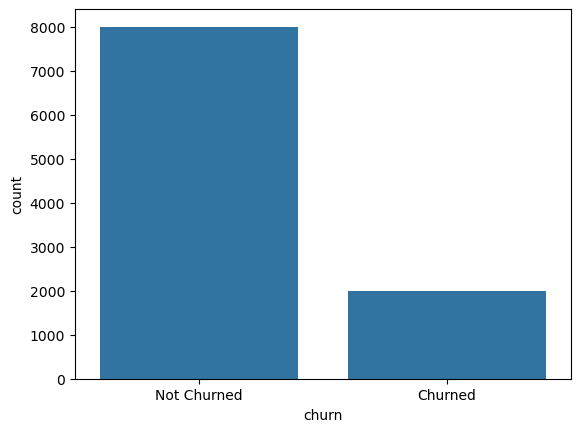

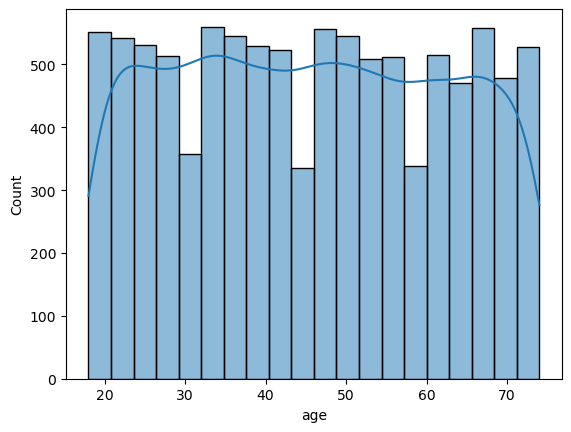

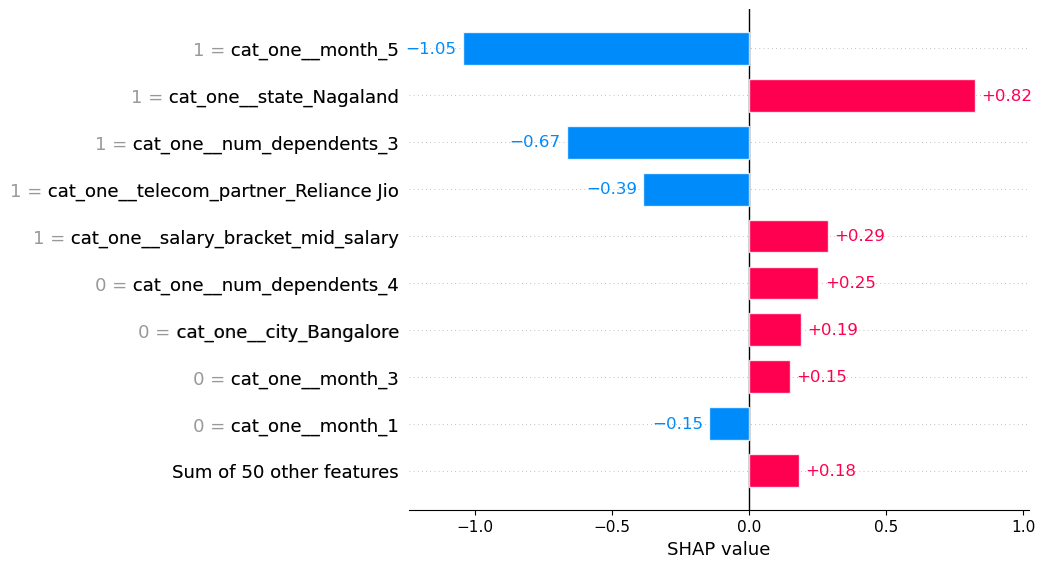

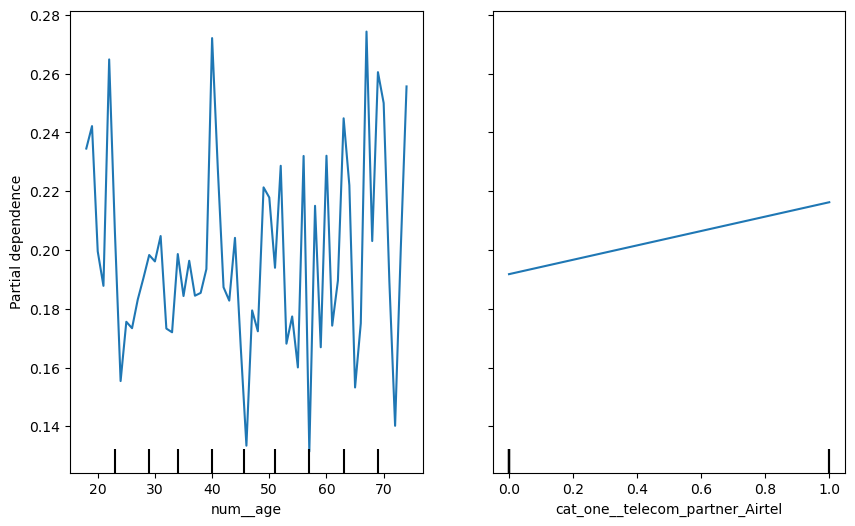

In [284]:
# 1) App code for deployment file
import streamlit as st
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay

# Loading variables - replace with saved variables in deployment file
df = churn_clean_df.copy()
best_model = best_model
best_preprocessor = best_preprocessor
X_train_transformed = X_train_transformed
X_test_transformed = X_test_transformed
feature_names = feature_names

# App title
st.title("Telecom Churn Data Interactive Dashboard")

# Sidebar filters
st.sidebar.header("Filters")
selected_partner = st.sidebar.multiselect("Telecom Partner", df["telecom_partner"].unique(), 
                                          default=df["telecom_partner"].unique())
selected_gender = st.sidebar.multiselect("Gender", df["gender"].unique(), default=df["gender"].unique())
selected_state = st.sidebar.multiselect("State", df["state"].unique(), default=df["state"].unique())
selected_month = st.sidebar.multiselect("Month", df["month"].unique(), default=df["month"].unique())

# Filter dataset
filtered_df = df[
    (df["telecom_partner"].isin(selected_partner)) &
    (df["gender"].isin(selected_gender)) &
    (df["state"].isin(selected_state)) &
    (df["month"].isin(selected_month))
]

# Show filtered dataset
st.subheader("Filtered Data")
st.write(filtered_df.head())

# Churn Distribution
st.subheader("Churn Distribution")
fig, ax = plt.subplots()
sns.countplot(x="churn", data=filtered_df, ax=ax)
ax.set_xticks([0, 1])
ax.set_xticklabels(["Not Churned", "Churned"])
st.pyplot(fig)

# Age Distribution
st.subheader("Age Distribution")
fig, ax = plt.subplots()
sns.histplot(filtered_df["age"], bins=20, kde=True, ax=ax)
st.pyplot(fig)

# SHAP Bar Plot for Single Record
st.subheader("SHAP Feature Contributions for Selected Record")
record_index = st.number_input("Select a record index:", min_value=0, max_value=len(X_train_transformed)-1, step=1)
fig = plt.figure(figsize=(10, 6))
explainer = shap.Explainer(best_model, X_test_transformed, feature_names=feature_names)
shap_values = explainer(X_test_transformed)
shap.plots.bar(shap_values[record_index])
st.pyplot(fig)

# Partial Dependence Plots
st.subheader("Partial Dependence Plots")
selected_features = st.multiselect(
    "Select variables to display in the Partial Dependence Plots", 
    feature_names, 
    default=[feature_names[0], feature_names[1]]
)

fig, ax = plt.subplots(figsize=(10, 6))
disp = PartialDependenceDisplay.from_estimator(
    best_model, 
    X_train_transformed, 
    features=selected_features, 
    feature_names=feature_names, 
    n_cols=2, 
    ax=ax
)

plt.subplots_adjust(hspace=0.5)
st.pyplot(fig)
plt.show() # Delete from deployment file

In [286]:
# 2) Saving variables for deployment file
import joblib

churn_clean_df.to_parquet("data/cleaned_churn_data.parquet", index=False)
joblib.dump(best_model, "data/best_model.pkl")
joblib.dump(best_preprocessor, "data/best_preprocessor.pkl")
joblib.dump(X_train_transformed, "data/X_train_transformed.pkl")
joblib.dump(X_test_transformed, "data/X_test_transformed.pkl")
joblib.dump(feature_names, "data/feature_names.pkl")

['data/feature_names.pkl']